<a href="https://colab.research.google.com/github/MSGanga/MSGanga/blob/main/Task7_Logistic_Regression_on_Social_Media_Ads_Assignment12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [286]:
# Social_Network_Ads.csv
url = "/content/Social_Network_Ads.csv"

This dataset contains information of users in a social network. Those informations are the user id the gender the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.


**Step 1 | Data Pre-Processing**

**Importing the Libraries**

In [287]:
# Importing the necessary modules.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTETomek 
from collections import Counter
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score,roc_curve


In [288]:
import warnings
warnings.filterwarnings("ignore")

**Importing the dataset**

In [289]:
# Loading the dataset
df = pd.read_csv(url)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [290]:
# Configuration of the DataFrame.
df.shape

(400, 5)

In [291]:
# Information of the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [292]:
# Descriptive statistics of the Dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [293]:
# Checking for duplicate rows.
df.duplicated().sum()

0

In [294]:
# Checking for missing values.
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [295]:
# Dropping unnecessary columns.
df.drop('User ID', axis = 1, inplace = True)

In [296]:
# count of values in 'Purchased' column
x=df.Purchased.value_counts()
x

0    257
1    143
Name: Purchased, dtype: int64

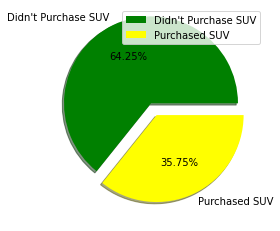

In [297]:
# Piechart w.r.t 'Purchased' column
label=["Didn't Purchase SUV","Purchased SUV"]
mycolors = ["green", "yellow"]
myexplode = [0.15, 0]
plt.pie(x,autopct="%.2f%%",labels=label, 
        explode=myexplode, shadow = True,
        colors = mycolors)
plt.legend()
plt.show()

**Splitting the dataset into the Training set and Test set**

In [298]:
# Splitting the dataset into Training Dataset and Testing Dataset.
y=df.Purchased
X=df[['Age','EstimatedSalary']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=1,stratify=df['Purchased'])

In [299]:
# Over-sampling using SMOTE and cleaning using Tomek links.
smt = SMOTETomek(sampling_strategy='all',random_state=42)
X_train, y_train = smt.fit_resample(X_train, y_train)
print(f'Resampled dataset shape:\n{Counter(y_train)}')

Resampled dataset shape:
Counter({0: 163, 1: 163})


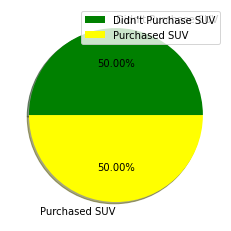

In [300]:
# Piechart w.r.t 'Purchased' column
train_count = y_train.value_counts() 
label=["Didn't Purchase SUV","Purchased SUV"]
mycolors = ["green", "yellow"]
myexplode = [0.15, 0]
plt.pie(train_count,autopct="%.2f%%",labels=label,
        shadow = True,colors = mycolors)
plt.legend()
plt.show()

In [301]:
# First five rows of the feature variables in Training dataframe.
X_train.head()

,Age,EstimatedSalary
0,24,89000
1,37,62000
2,30,116000
3,35,72000
4,25,22000


In [302]:
# First five rows of the feature variables in Testing dataframe.
X_test.head()

,Age,EstimatedSalary
163,35,38000
264,48,90000
106,26,35000
273,39,106000
52,29,83000


**Feature Scaling**

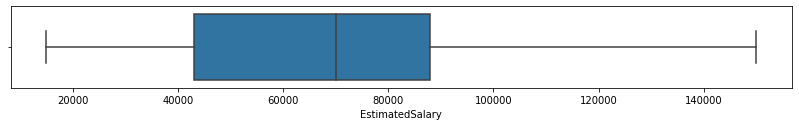

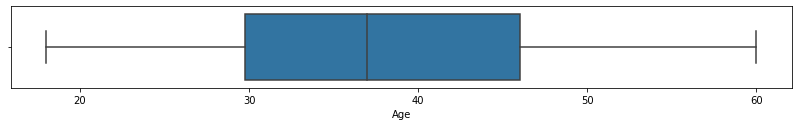

In [303]:
# Boxplot w.r.t 'EstimatedSalary' column.  
plt.figure(figsize=(14,1.5))
sns.boxplot(df.EstimatedSalary)
plt.show()

# Boxplot w.r.t 'Age' column.  
plt.figure(figsize=(14,1.5))
sns.boxplot(df.Age)
plt.show()


* No outliers are present. 
* Also, age and income have different ranges. Where age ranges from 18–60, while income ranges from 15000–150000.
Hence, we will go for Normalization.

In [304]:
# Transform features by scaling each feature to a given range in both Training & Testing df.
scaler = MinMaxScaler()
cols=['Age','EstimatedSalary']
scaler.fit(X_train[cols])
X_train[cols] = scaler.transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

# First 5 rows of X_train.
X_train.head()

,Age,EstimatedSalary
0,0.142857,0.548148
1,0.452381,0.348148
2,0.285714,0.748148
3,0.404762,0.422222
4,0.166667,0.051852


In [305]:
# # First 5 rows of X_test.
X_test.head()

,Age,EstimatedSalary
163,0.404762,0.170370
264,0.714286,0.555556
106,0.190476,0.148148
273,0.500000,0.674074
52,0.261905,0.503704


**Step 2 | Logistic Regression Model**

The library for this job which is going to be the linear model library and it is called linear because the logistic regression is a linear classifier which means that here since we're in two dimensions, our two categories of users are going to be separated by a straight line. Then import the logistic regression class. Next we will create a new object from this class which is going to be our classifier that we are going to fit on our training set.

**Fitting Logistic Regression to the Training set**

In [306]:
# Building a Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

**Step 3 | Predection**

In [307]:
# Making the Model predict
y_pred = model.predict(X_test)

In [308]:
# Actual and Predicted values of target variable.
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result.head()

,Actual,Predicted
163,0,0
264,1,1
106,0,0
273,1,1
52,0,0


**Step 4 | Evaluating The Predection**

We predicted the test results and now we will evaluate if our logistic regression model learned and understood correctly. So this confusion matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

**Making the Confusion Matrix**

In [309]:
# Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[76  9]
 [13 34]]


Number of True positives = 34

In [310]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        85
           1       0.79      0.72      0.76        47

    accuracy                           0.83       132
   macro avg       0.82      0.81      0.81       132
weighted avg       0.83      0.83      0.83       132



In [311]:
# To Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
logit_roc_auc = roc_auc_score(y_test, y_pred)
logit_roc_auc


0.8087609511889862

As the score value is high, we can conclude that our model is doing a good job.

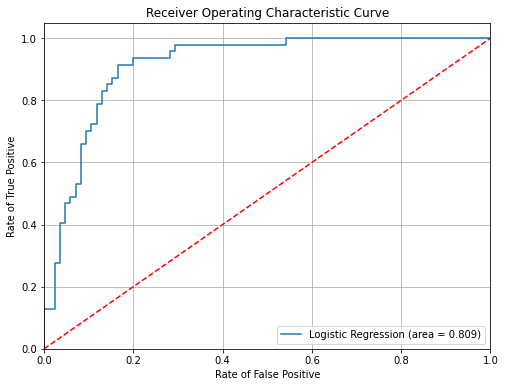

In [312]:
# Receiver Operating Characteristic (ROC) Curve
fpr, tpr, threshold = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Logistic Regression (area = {:.3f})'.format(logit_roc_auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Rate of False Positive')
plt.ylabel('Rate of True Positive')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.grid()
plt.savefig('Log_ROC')
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).This indicates that our model is a good one.

**Visualization**

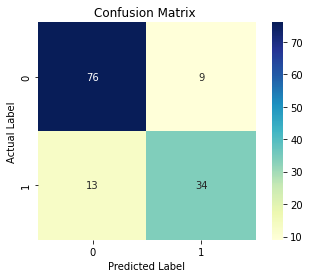

In [313]:
# create heatmap
sns.heatmap(confusion_matrix, annot=True, square=True, fmt='d', cmap="YlGnBu")
plt.title('Confusion Matrix ')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

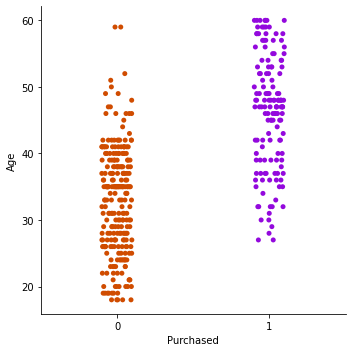

In [314]:
# Drawing categorical plots(Categorical scatterplot-->Default similar to stripplot())
sns.catplot(x="Purchased", y="Age", data=df, palette='gnuplot_r')
plt.show()

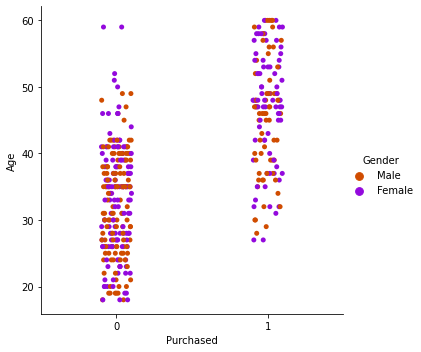

In [315]:
# Drawing categorical plots(Categorical scatterplot-->Default similar to stripplot())
sns.catplot(x="Purchased", y="Age", hue="Gender",data=df, palette='gnuplot_r' )
plt.show()

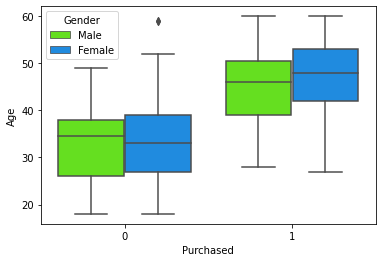

In [316]:
# boxplot(For Categorical distribution plots)
sns.boxplot(x="Purchased", y="Age", hue="Gender", data=df, palette='gist_rainbow')
plt.show()

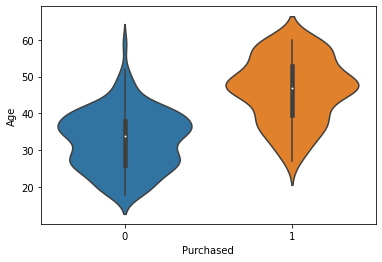

In [317]:
# violinplot(For Categorical distribution plots)
sns.violinplot(x="Purchased", y="Age", data=df)
plt.show()

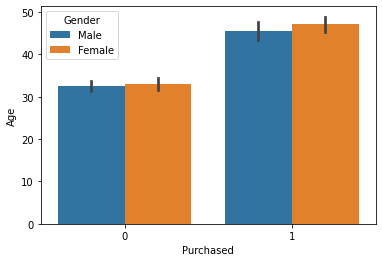

In [318]:
# barplot(Categorical estimate plot)
sns.barplot(x="Purchased", y="Age",hue='Gender', data=df)
plt.show()